In [1]:
path="images/"

In [2]:
import os
folders = os.listdir(path)
print(os.listdir(path))

['cats', 'dogs', 'horses', 'humans']


In [11]:
for f in folders:
    print(f+" "+str(len(os.listdir(path+f))))

cats 202
dogs 202
horses 202
humans 202


In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import shutil

Using TensorFlow backend.


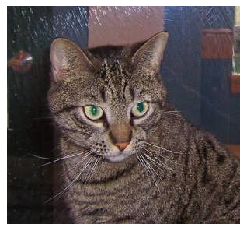

In [13]:
sample_path = path+"cats/cat.1.jpg"
img = image.load_img(sample_path) # Of Type PIL
x = image.img_to_array(img)/255.0 # Of Type Numpy
plt.imshow(x)
plt.axis("off")
plt.show()

In [7]:
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:
# Compiling Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
adam = optimizers.adam(lr=1e-4)
model.compile(optimizer=adam,loss="categorical_crossentropy",metrics=["accuracy"])

In [1]:
# Making Validation Folder and moving some pics from original folders to validation folder
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]

NameError: name 'os' is not defined

In [18]:
for c in classes:
    p = os.path.join("val_images",c)
    print(p)
    print(type(p))
    if not os.path.exists(p):
        os.mkdir(p)
        
val_split = 0.1
for folder in os.listdir("images"):
    path = "images/"+folder
    images = os.listdir(path)
    
    split_size = int(val_split*len(images))
    files_to_move = images[:split_size]
    print(len(files_to_move))
    
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+folder,img_f)
        shutil.move(src,dest)
        print(src)
        print(dest)
    

val_images\dogs
<class 'str'>
val_images\cats
<class 'str'>
val_images\horses
<class 'str'>
val_images\humans
<class 'str'>
20
images/cats\cat.1.jpg
val_images/cats\cat.1.jpg
images/cats\cat.10.jpg
val_images/cats\cat.10.jpg
images/cats\cat.100.jpg
val_images/cats\cat.100.jpg
images/cats\cat.101.jpg
val_images/cats\cat.101.jpg
images/cats\cat.102.jpg
val_images/cats\cat.102.jpg
images/cats\cat.103.jpg
val_images/cats\cat.103.jpg
images/cats\cat.104.jpg
val_images/cats\cat.104.jpg
images/cats\cat.105.jpg
val_images/cats\cat.105.jpg
images/cats\cat.106.jpg
val_images/cats\cat.106.jpg
images/cats\cat.107.jpg
val_images/cats\cat.107.jpg
images/cats\cat.108.jpg
val_images/cats\cat.108.jpg
images/cats\cat.109.jpg
val_images/cats\cat.109.jpg
images/cats\cat.11.jpg
val_images/cats\cat.11.jpg
images/cats\cat.110.jpg
val_images/cats\cat.110.jpg
images/cats\cat.111.jpg
val_images/cats\cat.111.jpg
images/cats\cat.112.jpg
val_images/cats\cat.112.jpg
images/cats\cat.113.jpg
val_images/cats\cat.113.j

In [19]:
print("Training Data")
for f in folders:
    print(f+" "+str(len(os.listdir("images/"+f))))
    
print("\nValidation Data")
for f in folders:
    print(f+" "+str(len(os.listdir("val_images/"+f))))

Training Data
cats 182
dogs 182
horses 182
humans 182

Validation Data
cats 20
dogs 20
horses 20
humans 20


In [16]:
# model.fit(...) useful when data is small and it can fit inside the memory

# Fitting model using Generators
train_gen = ImageDataGenerator(rescale=1.0/255.0)
val_gen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_gen.flow_from_directory(
    "images/",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

print(type(train_generator))
# train_generator.next() gives tuple with x and y values
x,y = train_generator.next()
print(x.shape)
print(type(x))
print(y.shape)
print(type(y))

Found 728 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
(32, 150, 150, 3)
<class 'numpy.ndarray'>
(32, 4)
<class 'numpy.ndarray'>


In [21]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
train_generator.next()

(array([[[[0.9843138 , 0.98823535, 0.9960785 ],
          [0.9843138 , 0.98823535, 0.9960785 ],
          [0.9843138 , 0.98823535, 0.9960785 ],
          ...,
          [0.9921569 , 0.9921569 , 0.9921569 ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.9843138 , 0.98823535, 0.9960785 ],
          [0.9843138 , 0.98823535, 0.9960785 ],
          [0.9843138 , 0.98823535, 0.9960785 ],
          ...,
          [0.9921569 , 0.9921569 , 0.9921569 ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.9843138 , 0.98823535, 0.9960785 ],
          [0.9843138 , 0.98823535, 0.9960785 ],
          [0.9843138 , 0.98823535, 0.9960785 ],
          ...,
          [0.9960785 , 0.9960785 , 0.9960785 ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.49803925, 0.4666667 , 0.27450982],
          [0.41960

In [23]:
hist = model.fit_generator(
    train_generator,
    epochs = 70,
    steps_per_epoch = 7,
    validation_data = val_generator,
    validation_steps=4
)

Epoch 1/70
7/7 [==============================] - 9s 1s/step - loss: 1.3949 - accuracy: 0.2545 - val_loss: 1.3908 - val_accuracy: 0.2411
Epoch 2/70
7/7 [==============================] - 8s 1s/step - loss: 1.3761 - accuracy: 0.2500 - val_loss: 1.3601 - val_accuracy: 0.3929
Epoch 3/70
7/7 [==============================] - 7s 974ms/step - loss: 1.3822 - accuracy: 0.2870 - val_loss: 1.3722 - val_accuracy: 0.3229
Epoch 4/70
7/7 [==============================] - 7s 1s/step - loss: 1.3662 - accuracy: 0.3661 - val_loss: 1.3789 - val_accuracy: 0.3661
Epoch 5/70
7/7 [==============================] - 7s 1s/step - loss: 1.3575 - accuracy: 0.3661 - val_loss: 1.3404 - val_accuracy: 0.4375
Epoch 6/70
7/7 [==============================] - 7s 973ms/step - loss: 1.3205 - accuracy: 0.3704 - val_loss: 1.3154 - val_accuracy: 0.3229
Epoch 7/70
7/7 [==============================] - 7s 1s/step - loss: 1.3152 - accuracy: 0.3304 - val_loss: 1.2796 - val_accuracy: 0.4286
Epoch 8/70
7/7 [===================

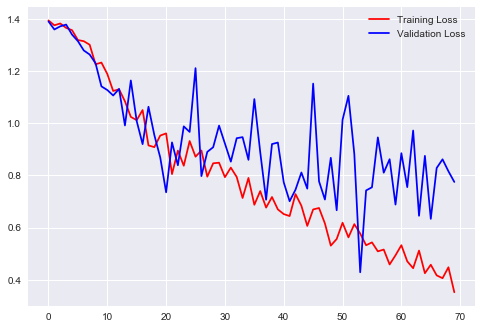

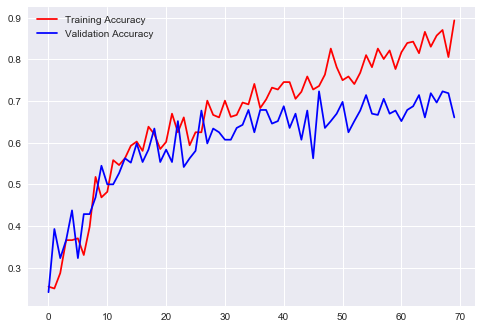

In [24]:
h = hist.history
import matplotlib.pyplot as plt
plt.style.use('seaborn')


# Visualizing Loss
plt.plot(h['loss'],'r',label="Training Loss")
plt.plot(h['val_loss'],'b',label="Validation Loss")
plt.legend()
plt.show()

# Visualizing Accuracy
plt.plot(h['accuracy'],'r',label="Training Accuracy")
plt.plot(h['val_accuracy'],'b',label="Validation Accuracy")
plt.legend()
plt.show()